# CAR PRICE PREDICTION

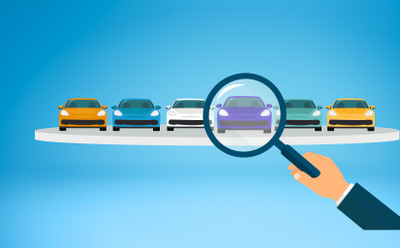

In [79]:
from IPython.display import Image
img = 'car.JPEG' 
Image(filename=img)

## Importing necessary libraries and Dataset

In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [81]:
df = pd.read_csv("car data.csv")

## Exploratory Data Analysis

In [82]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


## Statistic Summary of the Data

In [84]:
df.shape

(301, 9)

In [85]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [86]:
df.describe(include='object')

,Car_Name,Fuel_Type,Selling_type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


Let's check for null values

In [87]:
df.isnull()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
296,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False


### Dropping Null Values

In [88]:
df = df.dropna()
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

The data is cleaned now! ready for transformation

## Feature Engineering

In [89]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

Dropping Unnecesssary Columns

In [90]:
df = df.drop(columns=['Car_Name'])
df.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Naming Convention

In [91]:
df.columns = ['Year','Sell_Price','Present_Price','Km_driven','Fuel_Type','Sell_type','Transmission','Owner']
df.head(3)

,Year,Sell_Price,Present_Price,Km_driven,Fuel_Type,Sell_type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0


### Unique values in each condition

In [92]:
print("'Fuel_Type' variable have {} unique category : {}\n".format(df['Fuel_Type'].nunique(), df['Fuel_Type'].unique()))

'Fuel_Type' variable have 3 unique category : ['Petrol' 'Diesel' 'CNG']



In [93]:
print("'Sell_type' variable have {} unique category : {}\n".format(df['Sell_type'].nunique(), df['Sell_type'].unique()))

'Sell_type' variable have 2 unique category : ['Dealer' 'Individual']



In [94]:
print("'Transmission' variable have {} unique category : {}".format(df['Transmission'].nunique(),
                                                                    df['Transmission'].unique()))

'Transmission' variable have 2 unique category : ['Manual' 'Automatic']


In [95]:
df['Owner'].replace(to_replace=3, value=2, inplace= True)
print("'Owner' variable have {} unique category : {}".format(df['Owner'].nunique(), df['Owner'].unique()))

'Owner' variable have 3 unique category : [0 1 2]


In [96]:
df.head()
df.dtypes

Year               int64
Sell_Price       float64
Present_Price    float64
Km_driven          int64
Fuel_Type         object
Sell_type         object
Transmission      object
Owner              int64
dtype: object

## Data Visulaization

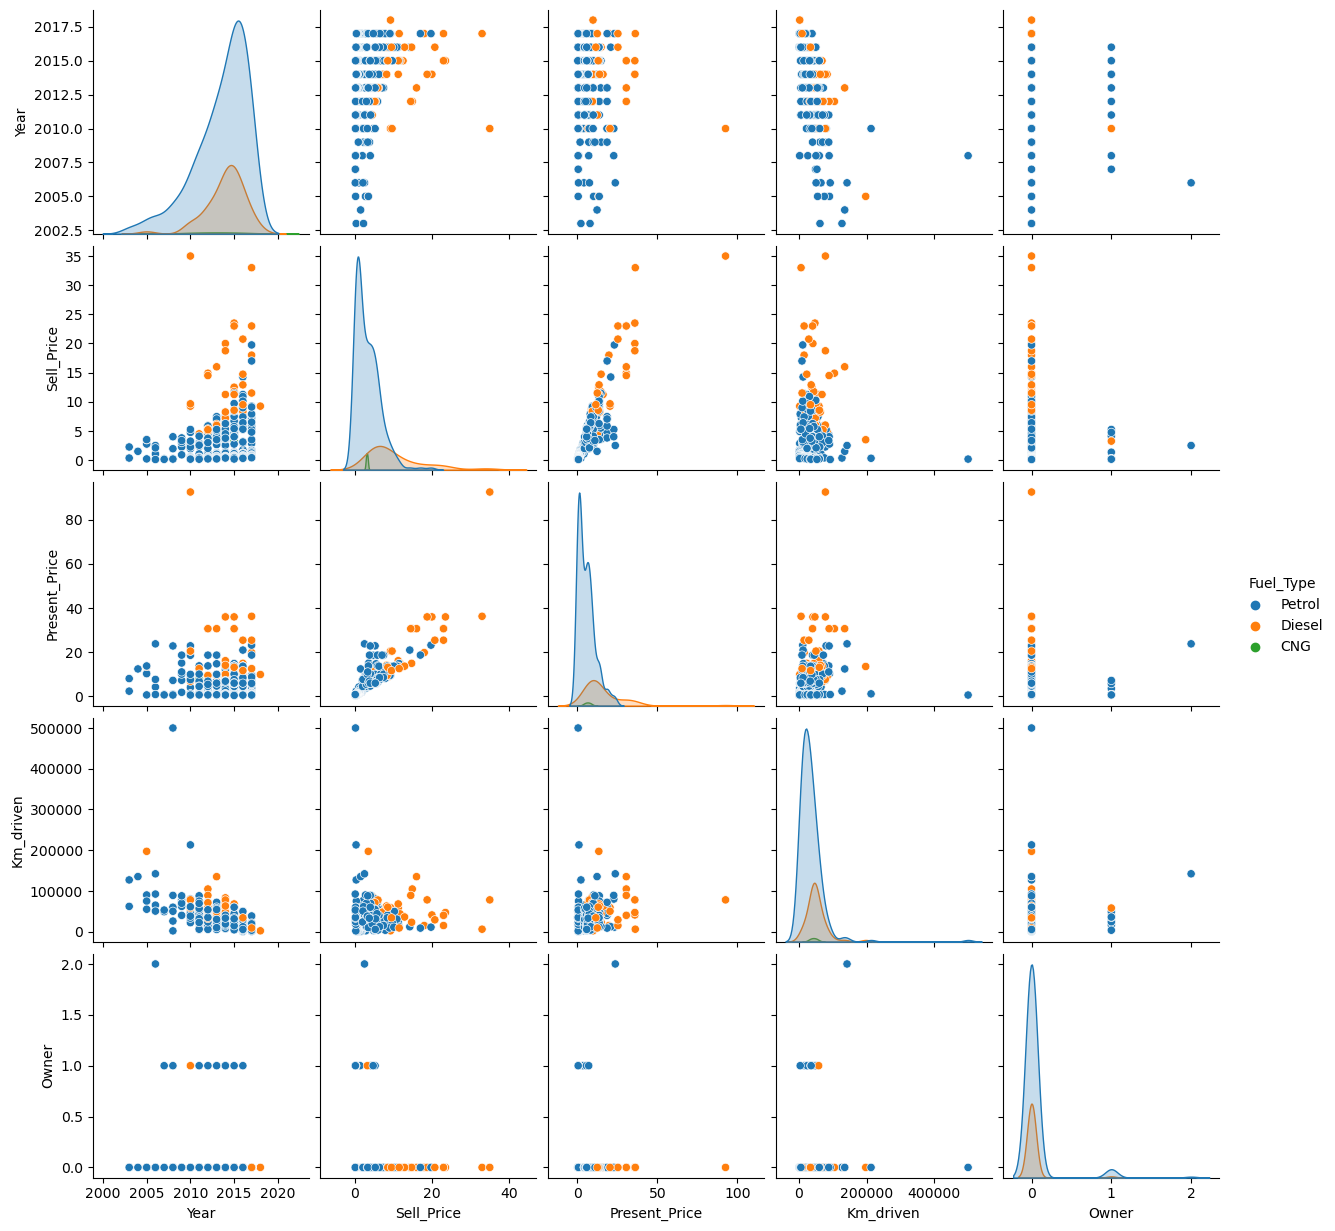

In [97]:
sns.pairplot(data=df, hue= 'Fuel_Type', diag_kind= 'kde')

### Number of Year Value Counts

Text(0.5, 1.0, 'Number of Year Value Counts')

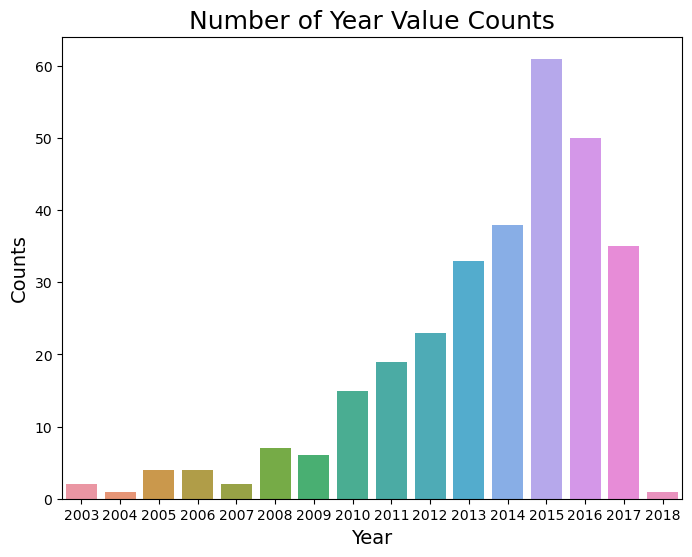

In [98]:
plt.figure(figsize=(8,6))
sns.countplot(data= df, x= 'Year')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Number of Year Value Counts', fontsize=18)

Text(0.5, 1.0, 'Car Price Distribution Plot')

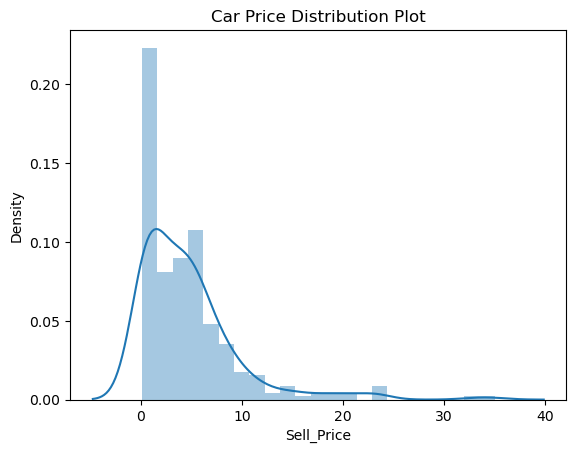

In [99]:
sns.distplot(df['Sell_Price'])
plt.title('Car Price Distribution Plot')

## Check for Linearity 

Using a scatter plot, we can check linearity between the dependent variables and independent variables 

<Axes: title={'center': 'Price and Year'}, xlabel='Year', ylabel='Sell_Price'>

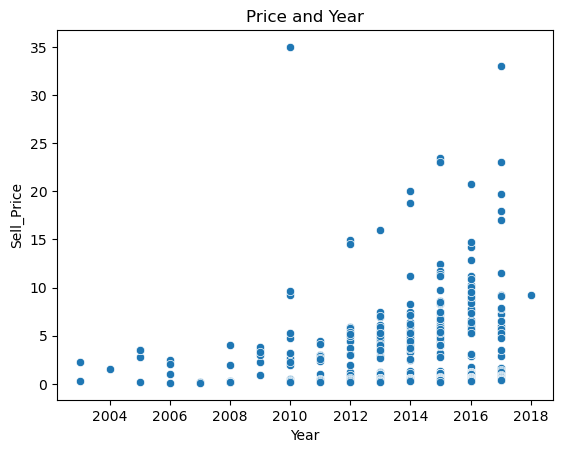

In [100]:
plt.title("Price and Year")
sns.scatterplot(x='Year',y='Sell_Price',data=df)

<Axes: title={'center': 'Present Price and Driven Kms'}, xlabel='Present_Price', ylabel='Km_driven'>

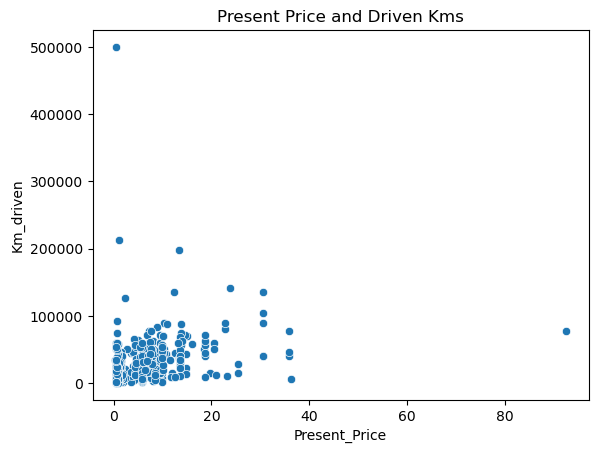

In [101]:
plt.title("Present Price and Driven Kms")
sns.scatterplot(x='Present_Price',y='Km_driven',data=df)

# Categorical Encoding

 let's map the data into numerical format for model training.

In [102]:
df = pd.get_dummies(df, drop_first = "True")
df.head()

,Year,Sell_Price,Present_Price,Km_driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Sell_type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,False,True,False,True
1,2013,4.75,9.54,43000,0,True,False,False,True
2,2017,7.25,9.85,6900,0,False,True,False,True
3,2011,2.85,4.15,5200,0,False,True,False,True
4,2014,4.60,6.87,42450,0,True,False,False,True


In [103]:
df.dtypes

Year                      int64
Sell_Price              float64
Present_Price           float64
Km_driven                 int64
Owner                     int64
Fuel_Type_Diesel           bool
Fuel_Type_Petrol           bool
Sell_type_Individual       bool
Transmission_Manual        bool
dtype: object

 Converting boolean values to integer

In [104]:
df['Fuel_Type_Diesel'] = df['Fuel_Type_Diesel'].astype('int')
df['Fuel_Type_Petrol'] = df['Fuel_Type_Petrol'].astype('int')
df['Sell_type_Individual'] = df['Sell_type_Individual'].astype('int')
df['Transmission_Manual'] = df['Transmission_Manual'].astype('int')

In [105]:
df.head()

,Year,Sell_Price,Present_Price,Km_driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Sell_type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,1,0,1
1,2013,4.75,9.54,43000,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,1,0,1
3,2011,2.85,4.15,5200,0,0,1,0,1
4,2014,4.60,6.87,42450,0,1,0,0,1


## Heat Map

<Axes: >

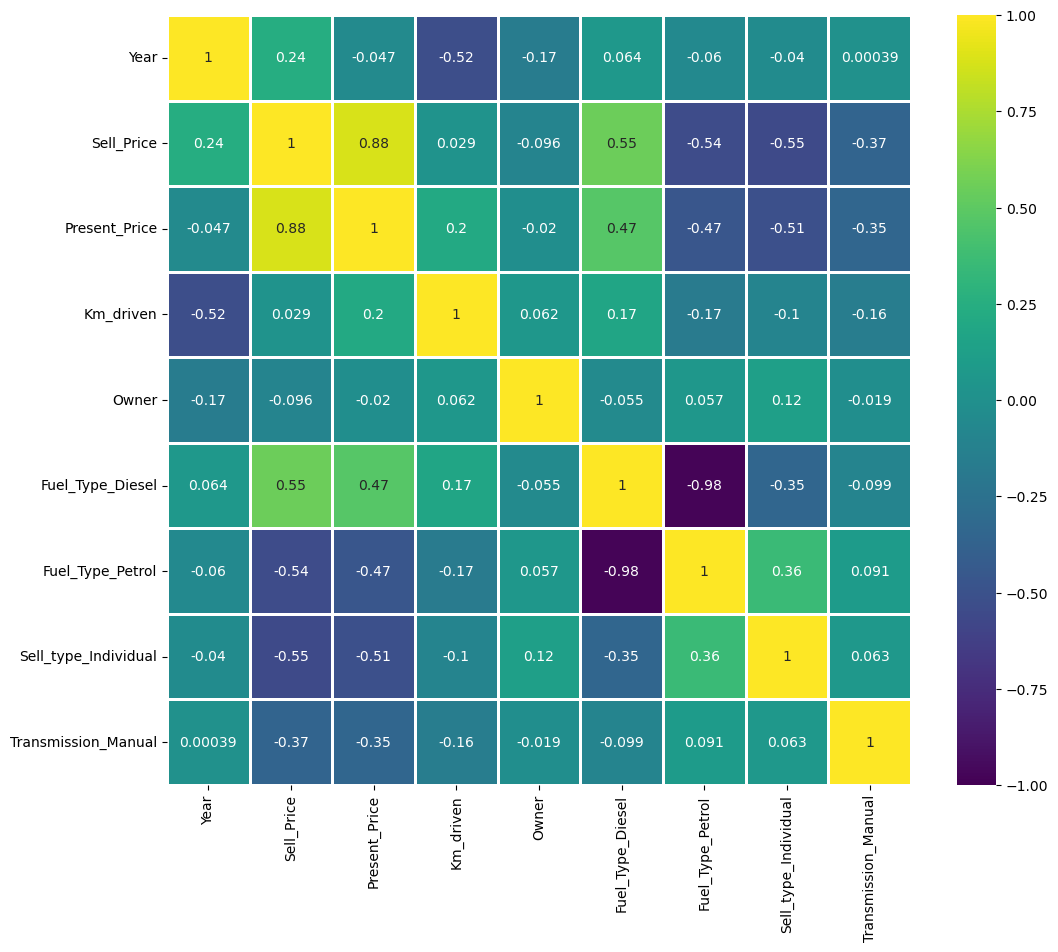

In [106]:
plt.figure(figsize=(12,10))
sns.heatmap(data = df.corr(), annot= True, cmap= 'viridis', vmin= -1 , vmax= 1, linecolor='white', linewidths=2)

# MODEL SELECTION

## MODEL TRAINING

### Defining the FEATURE MATRIX

In [107]:
x = df.drop(df.columns[1], axis=1) # independent variable
y = df.iloc[:, 1] # dependent variable

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
from sklearn import metrics

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## 1. Linear Regression

In [120]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

# training model
linreg.fit(x_train,y_train)

#Model summary
y_pred_linreg = linreg.predict(x_test)
r_squared_lr = r2_score(y_test,y_pred_linreg)
rmse_lr = np.sqrt(mean_squared_error(y_test,y_pred_linreg))
print("R_squared :",r_squared_lr)
print("RMSE :",rmse_lr)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_linreg))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_linreg))

R_squared : 0.7390600402990011
RMSE : 2.0227472566516664
MAE: 1.2256902477436897
MSE: 4.091506464291842


## 2. Random Forest Regressor 

In [121]:
from sklearn.ensemble import RandomForestRegressor
ranfor = RandomForestRegressor()

# Training Model
ranfor.fit(x_train,y_train)

# Model Summary
y_pred_rf = ranfor.predict(x_test)

r_squared_rf = r2_score(y_test,y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test,y_pred_rf))
print("R-squared :",r_squared_rf)
print("RMSE :",rmse_rf)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_rf))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_rf))

R-squared : 0.9624747922762544
RMSE : 0.7670662555007025
MAE: 0.5310557377049181
MSE: 0.588390640327869


## 3. Decision Tree Regressor

In [122]:
from sklearn.tree import DecisionTreeRegressor
dect=DecisionTreeRegressor()

#training Model
dect.fit(x_train,y_train)

#Model Summary
y_pred_dectree=dect.predict(x_test)

r_squared_dt = r2_score(y_test,y_pred_dectree)
rmse_dt = np.sqrt(mean_squared_error(y_test,y_pred_dectree))
print("R-squared :",r_squared_dt)
print("RMSE :",rmse_dt)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_dectree))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_dectree))

R-squared : 0.8983198152586023
RMSE : 1.2626689141993028
MAE: 0.7663934426229508
MSE: 1.5943327868852462


## 4. Gradient Boosting Regressor

In [123]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()

# Training Model
gb.fit(x_train,y_train)

# Model Summary
y_pred_gb = gb.predict(x_test)

r_squared_gb = r2_score(y_test,y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test,y_pred_gb))
print("R_squared :",r_squared_gb)
print("RMSE :",rmse_gb)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_gb))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_gb))

R_squared : 0.9582237960394756
RMSE : 0.8093489595436317
MAE: 0.5560183542598705
MSE: 0.6550457383143593


## MODEL EVALUATION

The performance of model is estimated on testing the appropriate metrics like Mean Absolute Error, Mean Squared Error and R-squared.

In [124]:
models = [ 'Linear Regression','Random Forest','Decision Tree','Gradient Boosting']
MAE       = [1.04996,0.56091,0.67065,0.61291]
MSE       = [2.31710,0.97097,1.54410,1.11300]
RSq       = [0.89447,0.95577,0.92967,0.93948] 
RMSE      = [1.55947,0.98537,1.24261,1.54494]

metrics_dict ={
    'Model': models,
    'MeanAbsoluteError': MAE, 
    'MeanSquare':MSE,
    'RSquared':RSq,
    'RootMeanSquare':RMSE}

metrics_df = pd.DataFrame(metrics_dict)
print(metrics_df)

               Model  MeanAbsoluteError  MeanSquare  RSquared  RootMeanSquare
0  Linear Regression            1.04996     2.31710   0.89447         1.55947
1      Random Forest            0.56091     0.97097   0.95577         0.98537
2      Decision Tree            0.67065     1.54410   0.92967         1.24261
3  Gradient Boosting            0.61291     1.11300   0.93948         1.54494


From the above observation, Random Forest Model is best to be implemented as it has the least RMS value and Maximum accuracy of 95%. 

____________________________________________________________________________________________________________________________